<a href="https://colab.research.google.com/github/mtwenzel/image-video-understanding/blob/master/Session_1_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is a Jupyter notebook.  
### The most important keyboard shortcuts (cf. the "Help" menu) are
* **cursor keys** to select cells
* **Enter** to go from command mode to edit mode (for changing cell contents)
  * (**Esc** would go back to command mode.)
* **Shift+Enter** to *execute and advance* a cell
  * While experimenting with different values in the same cell, **Ctrl+Enter** is also handy, which executes but does not advance the cursor.
* There is an edit mode with a green bar to the left, and a execution/command mode with a blue bar.
* In command mode, some keys have a function:
    * `l`: toggle line numbers
    * `a`: new cell above 
    * `b`: new cell below
    * `h`: help / see more keyboard shortcuts
    
### If you execute it in Google Colab, some extra functions are provided:

* Cells can **hide the code**. This is the case for the "Imports" cell below. Double-clicking still gets you to the code directly. The code can be hidden again with a double-click.
* Cells can provide convenient **parameter interfaces**, like drop-down lists, sliders, and input fields. You will see this in the "Initialize random data" cell below. Again, double-clicking brings up the code.

# Image and Video Understanding -- Session 1 (Classification)


## 1. First Experiments with Random Data
* Start by importing some required python modules that implement the layers we will use to build the network. 
* We also need a "container" to connect the layers: the "Model"

In [3]:
#@title Imports
#@markdown To edit the imports, double-click on the cell

#@markdown We set TensorFlow 2.x as default for this notebook. This includes Keras.

%tensorflow_version 2.x

from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, UpSampling2D, LocallyConnected2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers

import numpy as np

UsageError: Line magic function `%tensorflow_version` not found.


### Create random data

In these examples, we'll use artificial data first, and then switch to real data.

Run the code in the following cell, which will create a pair of input data `x_train` and corresponding output data `y_train` for training a classifier.  `x_train` contains the set number of training examples (or instances), with the set number of features. `y_train` contains labels, with the first half `1`, and the second `0`. Our goal is to train a model which takes the input data `x` and map them to one of the two classes `0` or `1` contained in `y`.

In [5]:
#@title Initialize random data
#@markdown Create random data sampled from uniform distribution.
#@markdown Set the desired number of instances
NUM_INSTANCES = 100 #@param {type:'slider', min:0, max:10000, step:100}
#@markdown Set the desired number of features (random from uniform distribution)
NUM_FEATURES = 1000 #@param {type:'slider', min:0, max:10000, step:100}
x_train = np.random.random((NUM_INSTANCES, NUM_FEATURES)) 
y_train = np.zeros((NUM_INSTANCES,)) # Label vector (initialized with 0s)
y_train[:int(NUM_INSTANCES/2)] = 1 # set first half of vector to 1


### Define the model

In [7]:
model = Sequential() # We choose a simple sequential model without branching
model.add(InputLayer(input_shape = (NUM_FEATURES,)))
#@markdown Play with the number of neurons
NUM_NEURONS = 256 #@param {type:'integer'}
model.add(Dense(units=NUM_NEURONS, name="Hidden")) 

#@markdown Optionally increase the number of layers.
#model.add(Dense(units=128))
#model.add(Dense(units=64))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adadelta')
model.summary()
# @markdown If only interested in the number of parameters, use this:
# @markdown `print("Model parameters: {0:,}".format(model.count_params()))`

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 256)               256256    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 256,513
Trainable params: 256,513
Non-trainable params: 0
_________________________________________________________________


### Training the network

Train the network by executing the following. 

Clicking left to the output once will change the display mode from a scrollable field to a full display and back. Double-clicking it collapses it, so it is not so dominant.
In Google Colab, you can savely `x` the output with a click in the top left corner. This removes the printout, but not the cell results.

In [8]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100)


Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 11ms/sample - loss: 1.0902
Epoch 2/100
100/100 [==============================] - 0s 88us/sample - loss: 1.0505
Epoch 3/100
100/100 [==============================] - 0s 89us/sample - loss: 1.0160
Epoch 4/100
100/100 [==============================] - 0s 87us/sample - loss: 0.9846
Epoch 5/100
100/100 [==============================] - 0s 92us/sample - loss: 0.9553
Epoch 6/100
100/100 [==============================] - 0s 103us/sample - loss: 0.9298
Epoch 7/100
100/100 [==============================] - 0s 86us/sample - loss: 0.9062
Epoch 8/100
100/100 [==============================] - 0s 100us/sample - loss: 0.8863
Epoch 9/100
100/100 [==============================] - 0s 82us/sample - loss: 0.8681
Epoch 10/100
100/100 [==============================] - 0s 93us/sample - loss: 0.8525
Epoch 11/100
100/100 [==============================] - 0s 71us/sample - loss: 0.8383
Epoch 12/100
100/100 [==================

100/100 [==============================] - 0s 87us/sample - loss: 0.7230
Epoch 97/100
100/100 [==============================] - 0s 83us/sample - loss: 0.7232
Epoch 98/100
100/100 [==============================] - 0s 93us/sample - loss: 0.7222
Epoch 99/100
100/100 [==============================] - 0s 79us/sample - loss: 0.7215
Epoch 100/100
100/100 [==============================] - 0s 90us/sample - loss: 0.7212


### Investigate the "history" object you created
The training stores its history and important parameters in the _history_ parameter we assigned it to. 
* Try out the following commands and inspect the variables.
* Make use of tab completion, e.g. by typing `hidden_layer.` and press `<tab>` 

In [9]:
loss_history = history.history['loss']
print(f'Loss history: {loss_history}')
weights = history.model.get_weights()
hidden_layer = history.model.get_layer("Hidden")
for w in weights:
    print(w.shape)

(1000, 256)
(256,)
(256, 1)
(1,)


* We can also display the learning success as measured by the loss by plotting it.

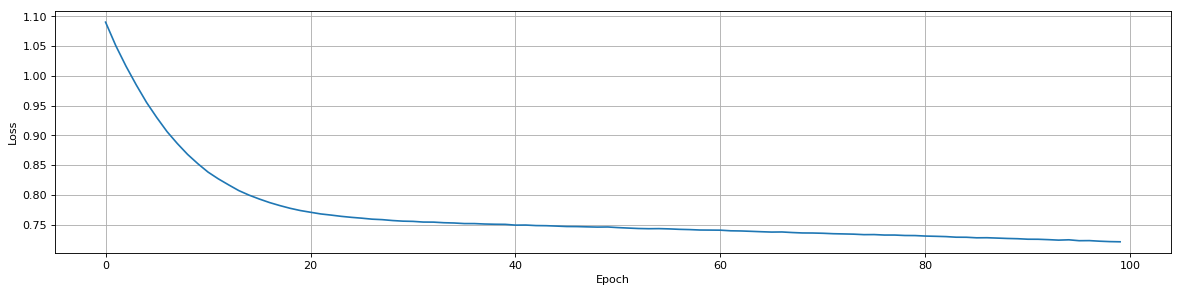

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
ax.plot(history.history['loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid()
plt.show()

### Interpreting the result
* What can you observe regarding the loss?
* Why is that possible?
* Change the number of training instances to 1000. Assure that the classes are equally frequent again. What can you observe?
* Be reminded that you have to re-create the model to reset the weights. To do this, execute the cell with the model definition (important is the `model.compile()` call)


### A remark on optimization
* Optimizers like SGD, ADAM, ADAGrad ADADelta etc. are variants of Stochastic Gradient Descent (SGD).
* SGD estimates the gradient for parameters based on a batch of examples.
    * The larger the batch, the better the estimated gradiend approximates the gradient for the whole dataset.
* It takes about 300 epochs to converge when creating 1000 instances.

## 2. Image Classification: _MNIST handwritten digits_

### Read the data

* We want to work on images: MNIST is a public dataset which contains images of handwritten digits. 
* You can import them from Keras with one line, because it is one of the standard datasets used for machine learning.

In [11]:
#@title Import MNIST data
#@markdown If you execute this cell, you will overwrite the data `x_train` and `y_train` above. In addition, it gives you test data in `x_test` and `y_test`.
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reduce data by factor 10 / 20 for fast execution during course
x_train = x_train[::10]
y_train = y_train[::10]
x_test = x_test[::20]
y_test = y_test[::20]

# verify resulting array shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6000, 28, 28), (6000,), (500, 28, 28), (500,))

### Inspecting the data

Look at the shape of the `x_train` variable to understand how the data is organised.

In [12]:
# Inspect the shape of x_train
print(x_train.shape)

(6000, 28, 28)


* You can see that the data has 6000 training examples, each of shape 28x28.
* These are images of size 28x28 pixels.


Look at the shape and values of `y_train` to understand the output.

In [13]:
 print(f'Shape of y: {y_train.shape}, Minimum of y: {y_train.min()}, Maximum of y: {y_train.max()}')

Shape of y: (6000,), Minimum of y: 0, Maximum of y: 9


* The corresponding output is just a long vector of corresponding labels in the range [0...9], refering to the displayed digit. 

As we are dealing with *images* now, we want to display them.
* `matplotlib` is a python package well suited plotting data and displaying images.
* Change the index of `x_train[index]` in the cell below to have a look at different images from the dataset. 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

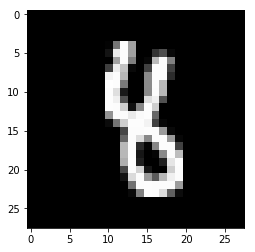

In [15]:
# Look at an image
plt.imshow(x_train[700], cmap='gray')

Also, we could be interested in the distribution of labels in our data so we plot a histogram:

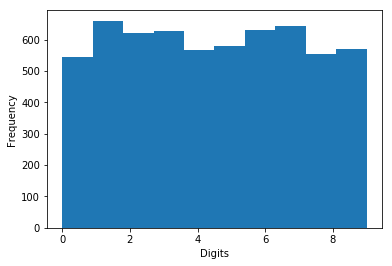

In [26]:
plt.hist(y_train)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.show()

### Preparing the labels for a classification network
We want to convert the numeric labels to so-called *"one-hot vectors"*.
* One-hot means that the network does not directly output a number between 0 and 9 representing the digit.
* Rather, we want a vector with 10 entries, in which only one entry is 1, all others 0, e.g. `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` to label a "2".
* *Rationale:* The digits represent different categorical classes, and we want to penalize all confused digits the same; it is not "better" or "closer" if the network outputs 4.2 given an image depicting a "6" than if the output is 1.
* In general, the one-hot encoding helps with classification problems and allows to let the neuron with maximal activation "win".

In [18]:
num_labels = 10
# Code to convert labels
y_train_one_hot = (np.arange(num_labels) == y_train[:,np.newaxis]).astype(np.float32)

In [19]:
# Keras offers a convenience function to achieve the same:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=num_labels)
# Same for the testing data
y_test_one_hot  = to_categorical(y_test, num_classes=num_labels)

Look at the shape of the one-hot-converted vector `y_train_one_hot` to assure that each training example no has 10 entries. Compare the digit representation exemplarily to the one-hot-representation.

In [20]:
print(y_train_one_hot.shape)
print(f'Digit {y_train[10]} is converted to {y_train_one_hot[10,:]}')

(6000, 10)
Digit 5 is converted to [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Image classification with a simple neural network
We now want to train the above network on this data. It should take the images in `x_train` as input and predicts the correct digit as stored in `y_train_one_hot`. We have to adapt the model to use inputs of 28 x 28, and to produce vector outputs. We have prepared this below:
* Modified the parameter `input_shape=(...)` to adapt to the new data
* Modified the number of dense units in the output layer to reflect the number of classes; 10 in the digits example
* Modified the loss function to deal with multiple classes

In [21]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Flatten()) # Layer reshaping the 28x28 arrays into vectors of length 28*28=784
model.add(Dense(units=128)) # Try higher or lower numbers of hidden units!
# Try adding more layers!
model.add(Dense(units=128))
model.add(Dropout(0.5))

#model.add(Dense(units=128))
#model.add(Dropout(0.5))

model.add(Dense(units=10, activation='softmax', name='output')) # The number of units in the output layer refers to the number if classes

model.compile(loss='categorical_crossentropy', optimizer='adadelta') # The categorical crossentropy loss can deal with multiple classes
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [78]:
# This experiments takes about 1 sec per epoch on an older MacBook Pro.
history = model.fit(x_train, y_train_one_hot, batch_size=500, epochs=100) # In this example, you'll no longer want batches of size 10...

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 161.0671
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 165.0433
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 161.8452
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 160.8152
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 158.6118
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 156.7018
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 162.2550
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 156.6969
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 156.4704
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 155.0619
Epoch 11/150
12/12 [==============================] - 0s 2ms/step - loss: 152.5592
Epoch 12/150
12/12 [==============================] - 0s 2ms/step - loss: 157.9172
Epoch 13/150


12/12 [==============================] - 0s 2ms/step - loss: 106.6866
Epoch 100/150
12/12 [==============================] - 0s 2ms/step - loss: 107.5397
Epoch 101/150
12/12 [==============================] - 0s 2ms/step - loss: 106.0874
Epoch 102/150
12/12 [==============================] - 0s 2ms/step - loss: 102.9905
Epoch 103/150
12/12 [==============================] - 0s 2ms/step - loss: 103.7584
Epoch 104/150
12/12 [==============================] - 0s 2ms/step - loss: 106.8543
Epoch 105/150
12/12 [==============================] - 0s 2ms/step - loss: 102.7055
Epoch 106/150
12/12 [==============================] - 0s 2ms/step - loss: 103.1265
Epoch 107/150
12/12 [==============================] - 0s 2ms/step - loss: 105.9344
Epoch 108/150
12/12 [==============================] - 0s 2ms/step - loss: 103.5383
Epoch 109/150
12/12 [==============================] - 0s 2ms/step - loss: 101.6815
Epoch 110/150
12/12 [==============================] - 0s 2ms/step - loss: 101.6412
Epoch 

### Evaluate the model on independent test data
* The following cell executes the model on the test data using `model.predict()`
* The result is a list of 10-vectors (recall the on-hot encoding), only this time there are also values between 0 and 1.
* How can we compare these with the true labels in `y_test_one_hot`? There are many possible ways to evaluate classifiers; in general, you want to define some kind of error, usually based on differences.

In [23]:
pred = model.predict(x_test)
print(f'Shape of the test input: {x_test.shape}, shape of the predicted output: {pred.shape}')
print(f'Exemplary prediction: {pred[0]}')

Shape of the test input: (500, 28, 28), shape of the predicted output: (500, 10)
Exemplary prediction: [0.0000000e+00 0.0000000e+00 4.5191017e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.7553774e-20 9.9548090e-01 0.0000000e+00 0.0000000e+00]


The `argmax()` function may come in handy, which converts from the one-hot representation back to integer indices of the maximally activated classes:

In [24]:
pred_integer_indices = pred.argmax(axis = -1)
print(f'Exemplary prediction: {pred_integer_indices[0]}')

Exemplary prediction: 7


Now that we have the prediction of our network on the test dataset: How well does this prediction fit the real classes of the data? Let's compare the predictions with the true classes `y_true`

In [25]:
diff = y_test - pred_integer_indices
correctly_classified_examples = np.where(diff == 0)[0].shape[0]
num_examples = y_test.shape[0]
wrongly_classified_examples = num_examples - correctly_classified_examples
print(f'{correctly_classified_examples} ({correctly_classified_examples/num_examples * 100} %) of the examples are classified correctly while {wrongly_classified_examples} ({wrongly_classified_examples/num_examples * 100}%) are classified wrong.')

180 (36.0 %) of the examples are classified correctly while 320 (64.0%) are classified wrong.


Are you satisfied with the performance of the classifier? If not, play around with the parameters and try to get a better result. You can for example do one of the following
* Take a look at the loss function using the code in the following cell:
    * Has the model finished it's training? You can increase the number of epochs in the model training above. 
    * Increase the batch size of the training.
    
* Increase the number of neurons (units) in the model. 
* Add more layers to you model.

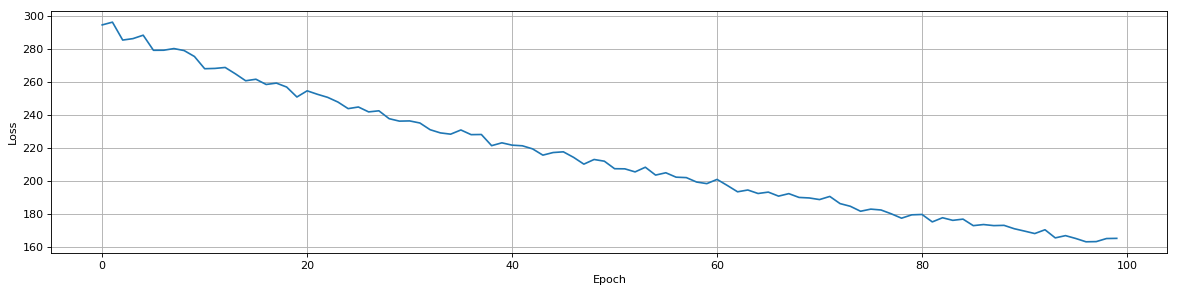

In [26]:
fig,ax = plt.subplots(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
ax.plot(history.history['loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid()
plt.show()

## 3. Image classification with a simple convolutional neural network (CNN)
We now try to solve the MNIST classification using a convolutional neural network. 

### Training
* First, your input data now needs to have a "channel" dimension, as the convolutional filter result will be a multi-channel image.
* Next, you will need to remove the 2D nature again to feed into dense layers. 
  * `Flatten()` does this for you.
  * Train the network as before.

In [27]:
import tensorflow
tensorflow.keras.backend.image_data_format()
tensorflow.keras.backend.set_image_data_format('channels_last')

In [87]:

convnet = Sequential()
convnet.add(InputLayer(input_shape=(28,28,1)))
convnet.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
convnet.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
convnet.add(MaxPool2D())
convnet.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
convnet.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
convnet.add(MaxPool2D())
convnet.add(Flatten())
convnet.add(Dense(units=128))
convnet.add(Dropout(0.5))
convnet.add(Dense(units=10, activation='softmax'))
convnet.compile(loss='categorical_crossentropy', optimizer='adadelta')
print("convnet parameters: {0:,}".format(convnet.count_params()))
convnet.summary()

convnet parameters: 230,186
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)      

In [79]:
convnet_history = convnet.fit(x_train[...,np.newaxis], y_train_one_hot, batch_size=500, epochs=100)

Epoch 1/100
12/12 [==============================] - 7s 582ms/step - loss: 20.1946
Epoch 2/100
12/12 [==============================] - 7s 571ms/step - loss: 20.2774
Epoch 3/100
12/12 [==============================] - 7s 567ms/step - loss: 19.6877
Epoch 4/100
12/12 [==============================] - 7s 580ms/step - loss: 18.9474
Epoch 5/100
12/12 [==============================] - 7s 585ms/step - loss: 19.0393
Epoch 6/100
12/12 [==============================] - 7s 595ms/step - loss: 18.2866
Epoch 7/100
12/12 [==============================] - 7s 597ms/step - loss: 17.5949
Epoch 8/100
12/12 [==============================] - 7s 592ms/step - loss: 17.8381
Epoch 9/100
12/12 [==============================] - 7s 599ms/step - loss: 17.5740
Epoch 10/100
12/12 [==============================] - 7s 616ms/step - loss: 17.1784
Epoch 11/100
12/12 [==============================] - 7s 615ms/step - loss: 17.1125
Epoch 12/100
12/12 [==============================] - 7s 589ms/step - loss: 16.8113
E

12/12 [==============================] - 7s 579ms/step - loss: 6.6315
Epoch 100/100
12/12 [==============================] - 7s 580ms/step - loss: 6.7921


### Compare the training performance

Take a look at the loss plot. You can also compare it directly with the loss from the fully-connected network above by plotting both into the same figure. What do you observe?

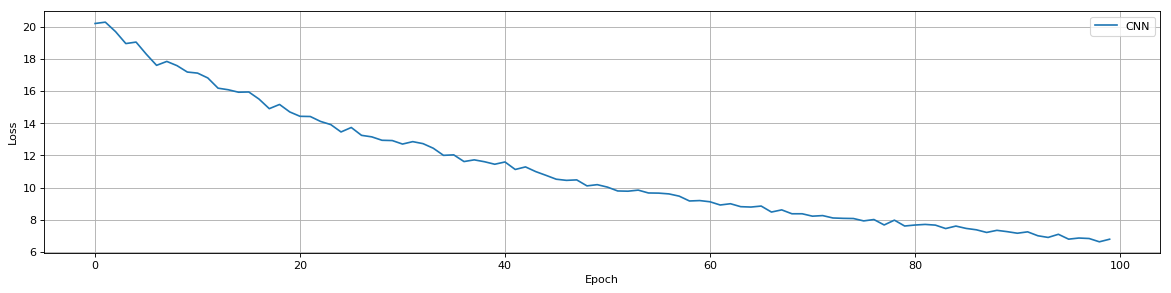

In [80]:
fig,ax = plt.subplots(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
ax.plot(convnet_history.history['loss'], label='CNN')
# Remove the # to plot both loss curves togehter
#ax.plot(history.history['loss'], label='FCN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid()
ax.legend()
plt.show()

### Evaluate on the test data
Apply the model to the test data and have a look how many cases are classified correctly:

In [81]:
pred = convnet.predict(x_test[...,np.newaxis])
pred_integer_indices = pred.argmax(axis = -1)

In [82]:
diff = y_test - pred_integer_indices
correctly_classified_examples = np.where(diff == 0)[0].shape[0]
num_examples = y_test.shape[0]
wrongly_classified_examples = num_examples - correctly_classified_examples
print(f'{correctly_classified_examples} ({correctly_classified_examples/num_examples * 100} %) of the examples are classified correctly while {wrongly_classified_examples} ({wrongly_classified_examples/num_examples * 100}%) are classified wrong.')

394 (78.8 %) of the examples are classified correctly while 106 (21.2%) are classified wrong.


To inspect the prediction performance in more detail the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a useful evaluation metric. It displays for every class the amount of examples which are classified as any of the given classes.

In [83]:
import sklearn.metrics
pred = convnet.predict(x_test[...,np.newaxis])
cm = sklearn.metrics.confusion_matrix(pred.argmax(axis = -1), y_test)
cm

array([[32,  0,  2,  0,  0,  1,  2,  0,  1,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  2,  1,  1],
       [ 0,  1, 36,  7,  0,  1,  0,  3,  1,  0],
       [ 1,  1,  2, 35,  0,  3,  0,  1,  2,  1],
       [ 0,  0,  1,  1, 46,  1,  1,  0,  0,  8],
       [ 3,  0,  0,  6,  2, 39,  0,  0,  2,  3],
       [ 1,  0,  2,  1,  3,  1, 42,  0,  1,  1],
       [ 0,  1,  0,  1,  0,  0,  0, 48,  0,  8],
       [ 1,  7,  2,  3,  0,  1,  1,  1, 38,  3],
       [ 0,  0,  0,  0,  1,  0,  0,  4,  0, 31]])

It's more intuitive to look at it as a heat map.

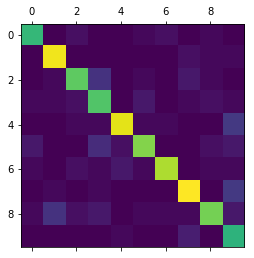

In [84]:
plt.matshow(cm)
plt.show()

Side note: Numpy and Matplotlib are two important, central libraries for numeric computing with Python. In addition, there are also more advanced libraries such as Seaborn, which build upon the things introduced above and offer dedicated functions for complex graphics, such as a combined version of the above matrix + heatmap.

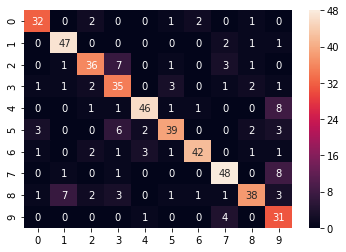

In [85]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True)

Looking at the confusion map:
* Which classes are easy for the classifier and which are hard?
* Which classes get mixed up a lot? Can you think about a reason for that? 

Are you satisifed with the results of the classifier? Try out different configurations:
* Change the number of epochs used during training
* Change the batch size.
* Add more layers to the model.
* Change the number of filters or the kernel_size of the model
* ...